# EDA and Model Building

In [2]:
# import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the pre-processed dataset

data = pd.read_csv('home_llc_preprocessed_dataset.csv')

In [4]:
# to get the first 5 rows
data.head()

,DATE,CSUSHPISA,Year,Month,Crude oil (WTISPLC),COMPUTSA(Construction materials cost),LOCATION,Value(Consumer Confidence),CUUR0000SEHA(Price to Rent),Q4TR771BIS(Real Estate Market Index,...,Inflation Rate(%),Annual Change(Inflation Rate),RSAHORUSQ156S(US national home ownership),Population,Annual Growth Rate(Population),Poverty Rate % Under US $5.50 Per Day,Change(Poverty Rate),Unemployement Rate %,Annual Change(US unemployment rate),BOGZ1FL513178005Q(US Property Tax)
0,2000-01-01,100.551000,2000.0,1.000000,27.18,1574.0,USA,102.82760,181.100000,1.502449,...,2.493209,0.253478,67.100000,3.130357e+08,0.841446,1.847619,-0.014286,5.854391,-0.026522,9621.0
1,2000-01-02,100.616667,2000.0,1.083333,29.35,1677.0,USA,102.83205,181.133333,1.502449,...,2.493209,0.253478,67.114286,3.130357e+08,0.841446,1.847619,-0.014286,5.854391,-0.026522,9622.0
2,2000-01-03,100.682333,2000.0,1.166667,29.89,1704.0,USA,102.83650,181.166667,1.502449,...,2.493209,0.253478,67.128571,3.130357e+08,0.841446,1.847619,-0.014286,5.854391,-0.026522,9623.0
3,2000-01-04,100.748000,2000.0,1.250000,25.74,1610.0,USA,102.84095,181.200000,1.502449,...,2.493209,0.253478,67.142857,3.130357e+08,0.841446,1.847619,-0.014286,5.854391,-0.026522,9624.0
4,2000-01-05,100.813667,2000.0,1.333333,28.78,1682.0,USA,102.84540,181.233333,1.502449,...,2.493209,0.253478,67.157143,3.130357e+08,0.841446,1.847619,-0.014286,5.854391,-0.026522,9625.0


In [5]:
# to get the shape
data.shape

(552, 27)

In [6]:
# to get the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DATE                                       552 non-null    object 
 1   CSUSHPISA                                  552 non-null    float64
 2   Year                                       552 non-null    float64
 3   Month                                      552 non-null    float64
 4   Crude oil (WTISPLC)                        552 non-null    float64
 5   COMPUTSA(Construction materials cost)      552 non-null    float64
 6   LOCATION                                   552 non-null    object 
 7   Value(Consumer Confidence)                 552 non-null    float64
 8   CUUR0000SEHA(Price to Rent)                552 non-null    float64
 9   Q4TR771BIS(Real Estate Market Index        552 non-null    float64
 10   GDP                      

In [7]:
# to get the data types alone
data.dtypes

DATE                                          object
CSUSHPISA                                    float64
Year                                         float64
Month                                        float64
Crude oil (WTISPLC)                          float64
COMPUTSA(Construction materials cost)        float64
LOCATION                                      object
Value(Consumer Confidence)                   float64
CUUR0000SEHA(Price to Rent)                  float64
Q4TR771BIS(Real Estate Market Index          float64
 GDP                                         float64
 Per Capita                                  float64
 Growth Rate                                 float64
 GDP Growth (%)                              float64
 Annual Change                               float64
GDP Per Capita(US $)                         float64
Annual Growth Rate                           float64
Inflation Rate(%)                            float64
Annual Change(Inflation Rate)                f

In [10]:
# to find the Correlation matrix
corr_matrix = data.corr()
corr_matrix

,CSUSHPISA,Year,Month,Crude oil (WTISPLC),COMPUTSA(Construction materials cost),Value(Consumer Confidence),CUUR0000SEHA(Price to Rent),Q4TR771BIS(Real Estate Market Index,GDP,Per Capita,...,Inflation Rate(%),Annual Change(Inflation Rate),RSAHORUSQ156S(US national home ownership),Population,Annual Growth Rate(Population),Poverty Rate % Under US $5.50 Per Day,Change(Poverty Rate),Unemployement Rate %,Annual Change(US unemployment rate),BOGZ1FL513178005Q(US Property Tax)
CSUSHPISA,1.000000,0.815850,6.787002e-02,0.281653,0.041787,-0.228070,0.869361,-0.150246,1.704462e-01,1.749826e-01,...,1.052368e-01,9.547507e-02,-0.347589,0.722669,-0.849659,-2.973348e-02,-6.996672e-02,-7.160270e-02,-5.786953e-02,0.215129
Year,0.815850,1.000000,6.667319e-03,0.366456,-0.414577,-0.209568,0.988411,-0.050343,3.036407e-01,3.023428e-01,...,2.257384e-02,5.168398e-02,-0.755005,0.935352,-0.844620,4.337892e-03,-6.528349e-02,-8.213477e-03,-3.996408e-02,0.004984
Month,0.067870,0.006667,1.000000e+00,-0.034099,-0.010148,-0.109795,0.057046,-0.036601,2.034002e-02,2.070662e-02,...,4.712232e-02,2.681763e-02,-0.011369,0.039591,-0.050315,-4.371093e-17,1.657259e-17,-1.747705e-02,-1.616986e-02,-0.039037
Crude oil (WTISPLC),0.281653,0.366456,-3.409937e-02,1.000000,-0.548194,-0.569721,0.311337,0.266622,1.320455e-01,1.343893e-01,...,2.500541e-02,2.830748e-02,-0.169022,0.302183,-0.237707,3.120316e-02,-4.704216e-02,9.327958e-02,-3.925207e-02,-0.340477
COMPUTSA(Construction materials cost),0.041787,-0.414577,-1.014803e-02,-0.548194,1.000000,0.496004,-0.328815,-0.103219,-2.253662e-01,-2.200043e-01,...,5.854951e-02,1.669903e-02,0.562967,-0.425180,0.148385,-6.165354e-02,-1.121913e-02,-1.303445e-01,-1.280746e-02,0.550257
Value(Consumer Confidence),-0.228070,-0.209568,-1.097948e-01,-0.569721,0.496004,1.000000,-0.212015,0.065690,-1.042047e-02,-1.174362e-02,...,-8.217888e-02,-4.226993e-02,-0.064787,-0.074419,0.180615,1.165058e-03,8.882818e-04,-8.554357e-02,-1.928684e-02,0.434426
CUUR0000SEHA(Price to Rent),0.869361,0.988411,5.704627e-02,0.311337,-0.328815,-0.212015,1.000000,-0.087695,2.747560e-01,2.737976e-01,...,5.121183e-02,6.726186e-02,-0.693319,0.926703,-0.885840,-1.092576e-02,-6.803786e-02,-3.011650e-02,-4.229571e-02,0.087350
Q4TR771BIS(Real Estate Market Index,-0.150246,-0.050343,-3.660064e-02,0.266622,-0.103219,0.065690,-0.087695,1.000000,1.153272e-02,9.998055e-03,...,-9.156519e-02,-7.723113e-02,0.017804,-0.043746,0.093239,-4.746001e-02,-9.122856e-02,8.432127e-02,6.023737e-02,-0.019826
GDP,0.170446,0.303641,2.034002e-02,0.132045,-0.225366,-0.010420,0.274756,0.011533,1.000000e+00,9.992070e-01,...,-3.563570e-16,-1.094229e-16,-0.337311,0.281249,-0.148045,-2.414350e-15,2.875349e-17,1.025203e-15,-4.901762e-18,-0.140879
Per Capita,0.174983,0.302343,2.070662e-02,0.134389,-0.220004,-0.011744,0.273798,0.009998,9.992070e-01,1.000000e+00,...,-3.980454e-16,-7.587856e-17,-0.330890,0.278771,-0.145955,-2.278428e-15,-1.129033e-16,1.167378e-15,9.896756e-17,-0.140346


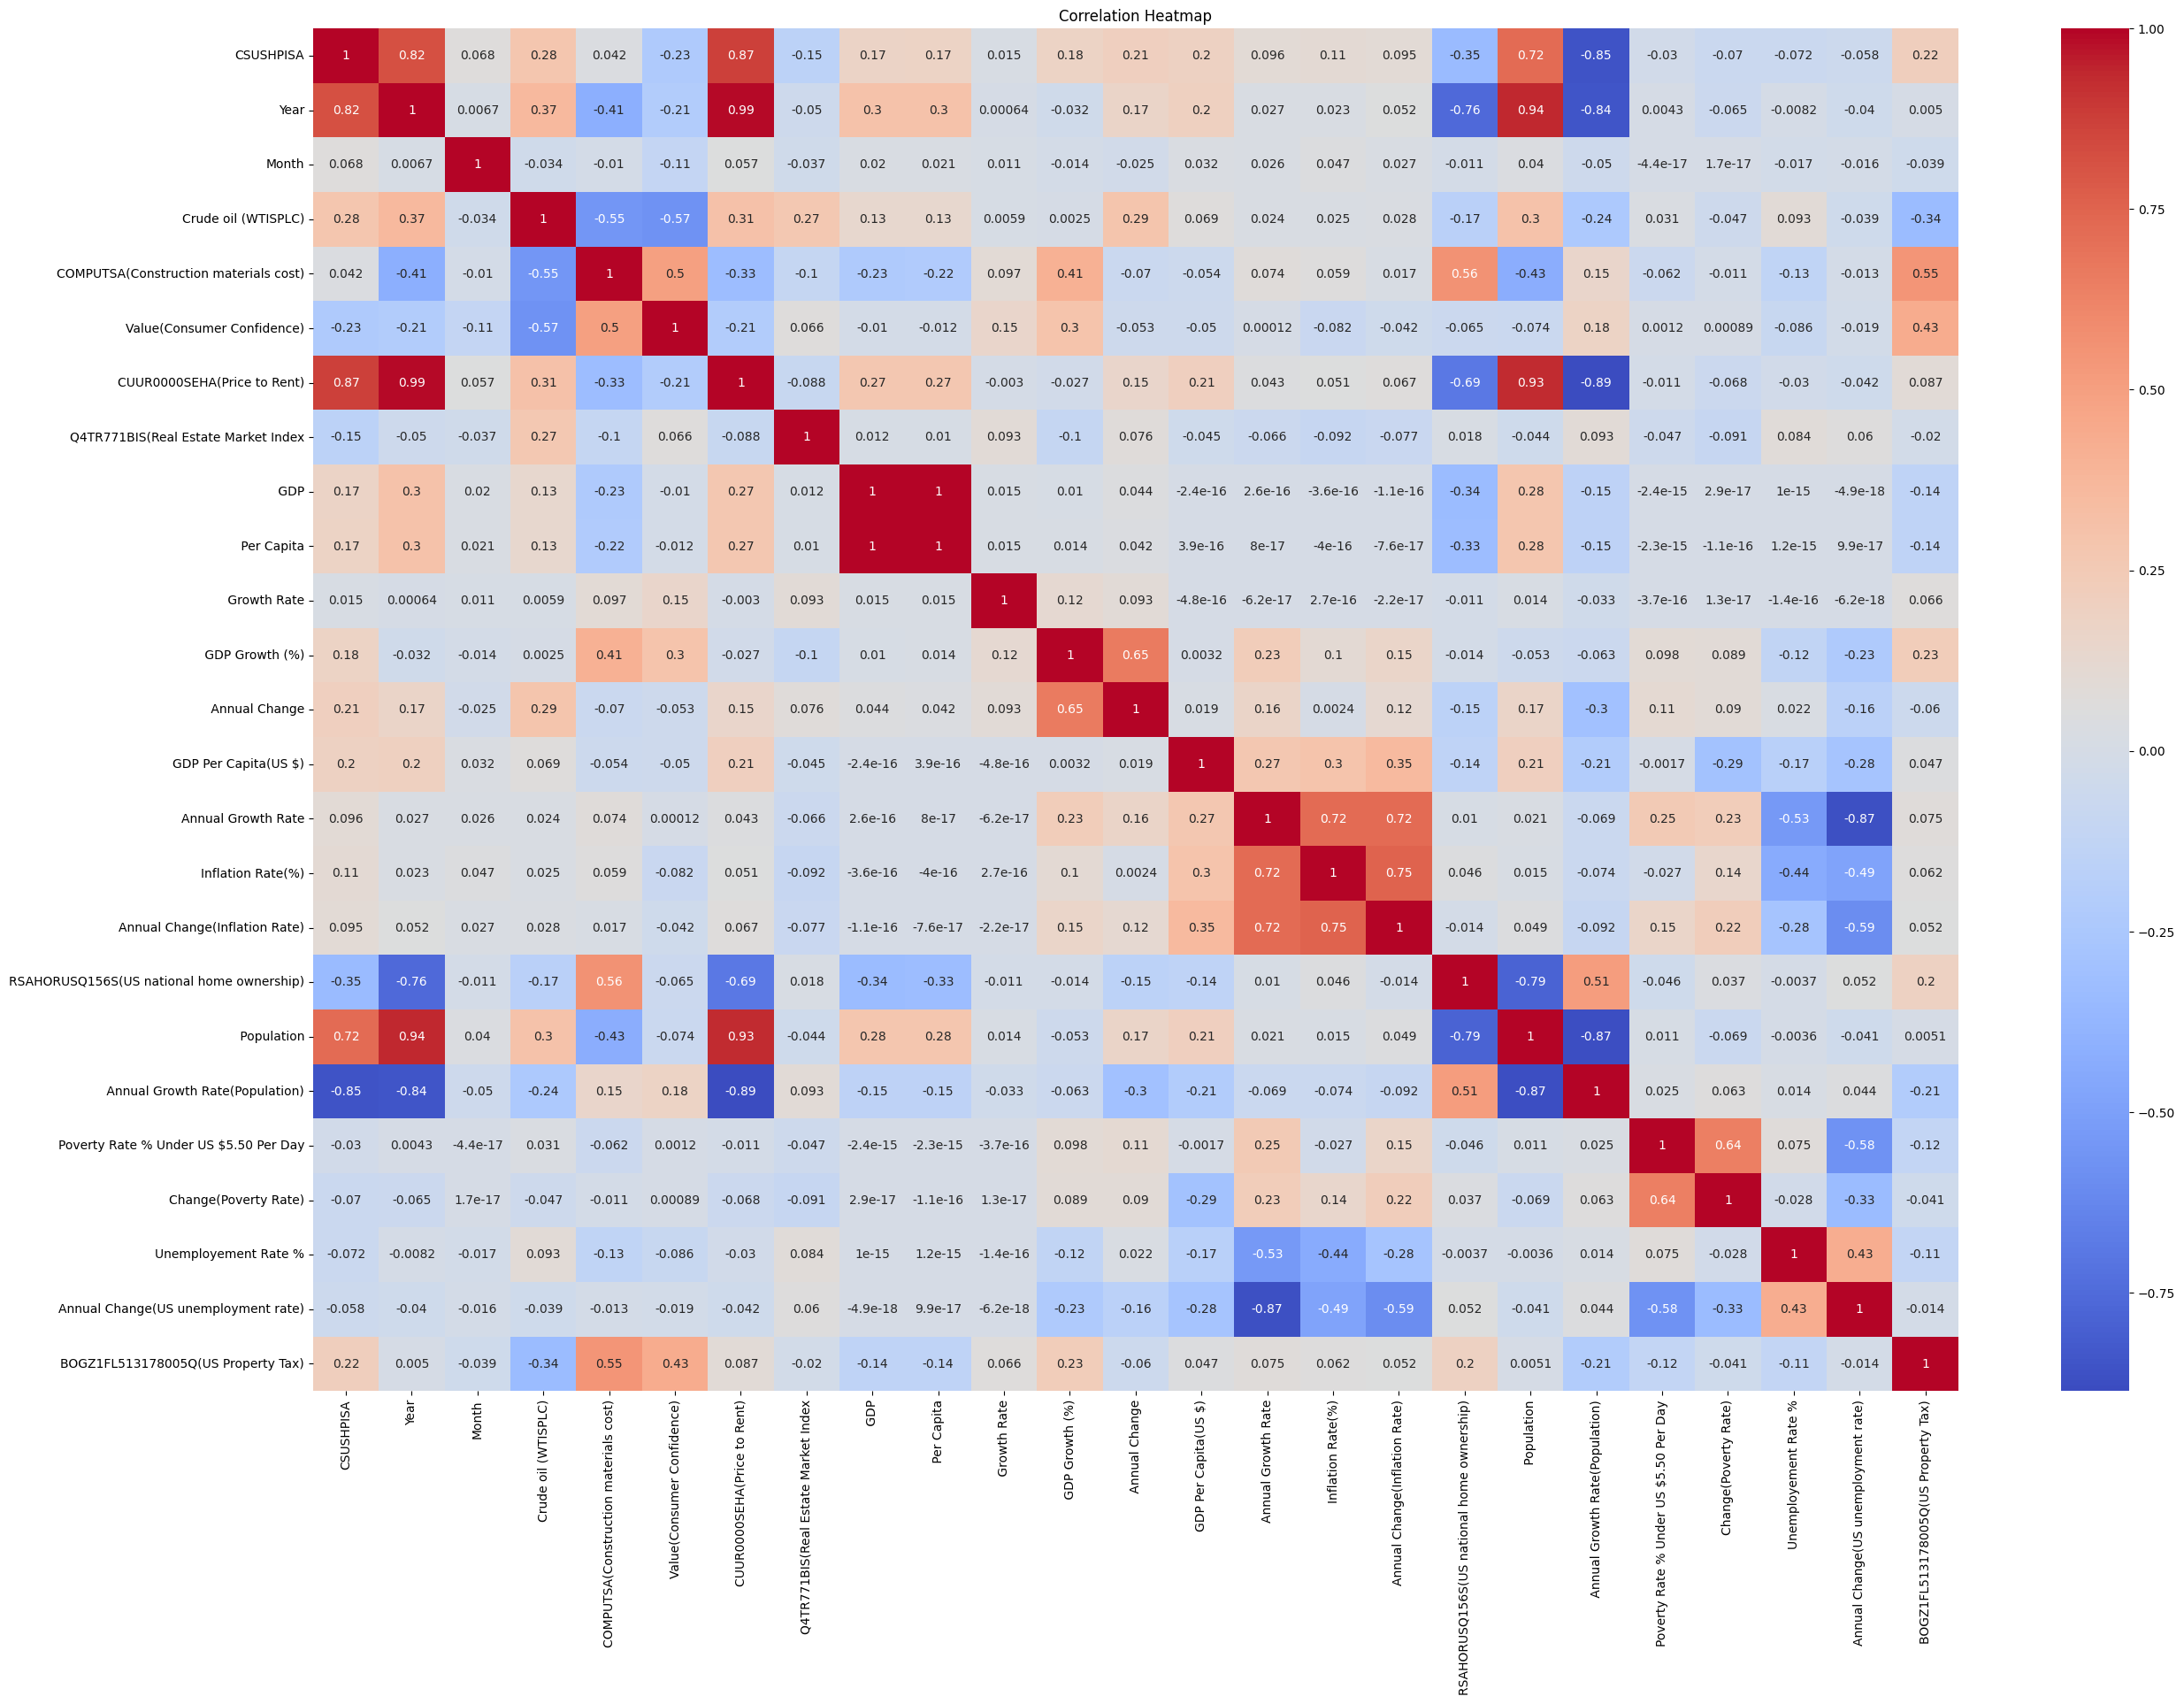

In [16]:
# to Visualize correlations
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

From the above Heat map visual itis clear that the target variable has high co-relation with the features called Price to Rent, Year and Population. 

At the same time the target variable has a minimum negative co-relation with the features called Unemployement rate, Poverty Rate, US national home ownership and Real Estate Market Index.

In [18]:
# to get the columns
data.columns

Index(['DATE', 'CSUSHPISA', 'Year', 'Month', 'Crude oil (WTISPLC)',
       'COMPUTSA(Construction materials cost)', 'LOCATION',
       'Value(Consumer Confidence)', 'CUUR0000SEHA(Price to Rent)',
       'Q4TR771BIS(Real Estate Market Index', ' GDP', ' Per Capita',
       ' Growth Rate', ' GDP Growth (%)', ' Annual Change',
       'GDP Per Capita(US $)', 'Annual Growth Rate', 'Inflation Rate(%)',
       'Annual Change(Inflation Rate)',
       'RSAHORUSQ156S(US national home ownership)', ' Population',
       ' Annual Growth Rate(Population)',
       'Poverty Rate % Under US $5.50 Per Day', 'Change(Poverty Rate)',
       'Unemployement Rate %', 'Annual Change(US unemployment rate)',
       'BOGZ1FL513178005Q(US Property Tax)'],
      dtype='object')

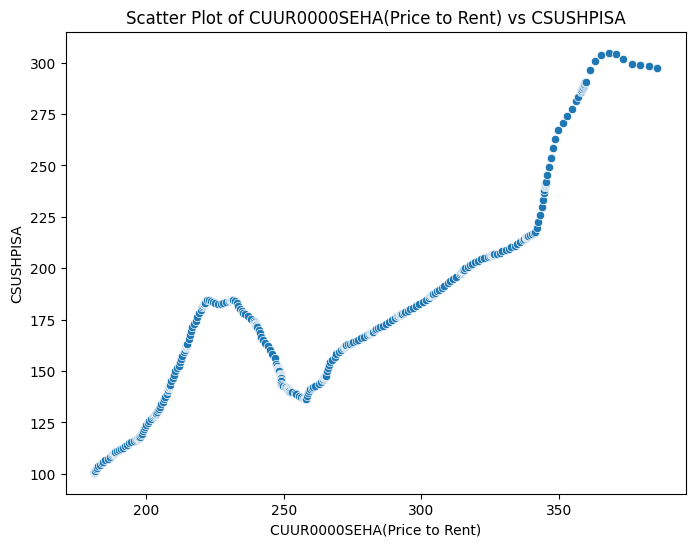

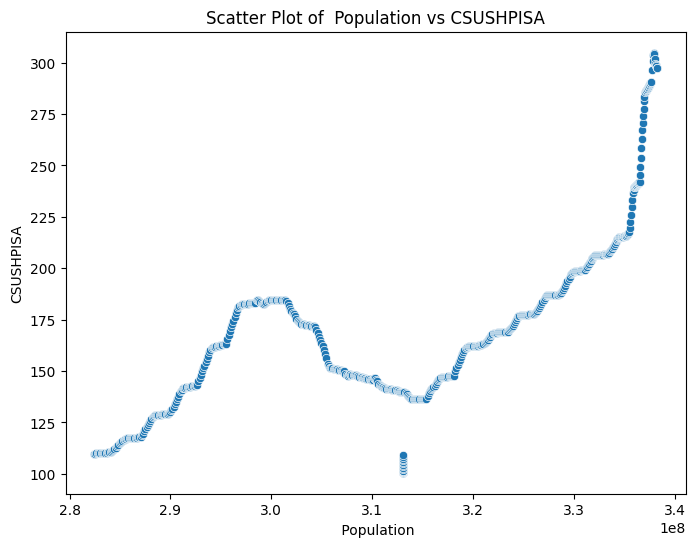

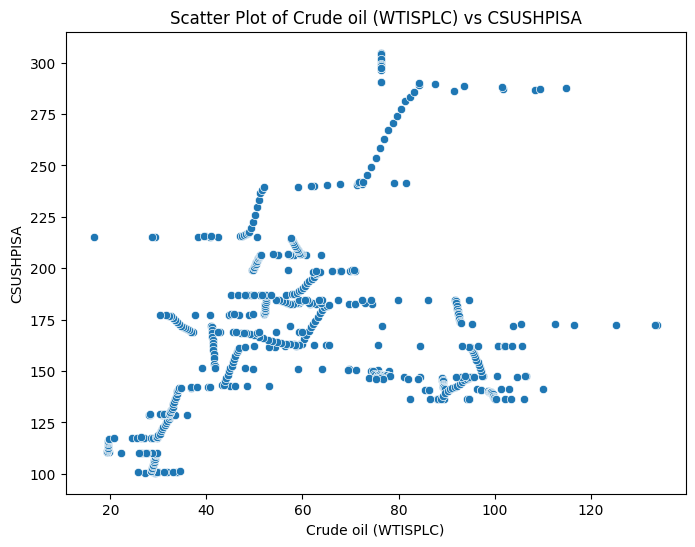

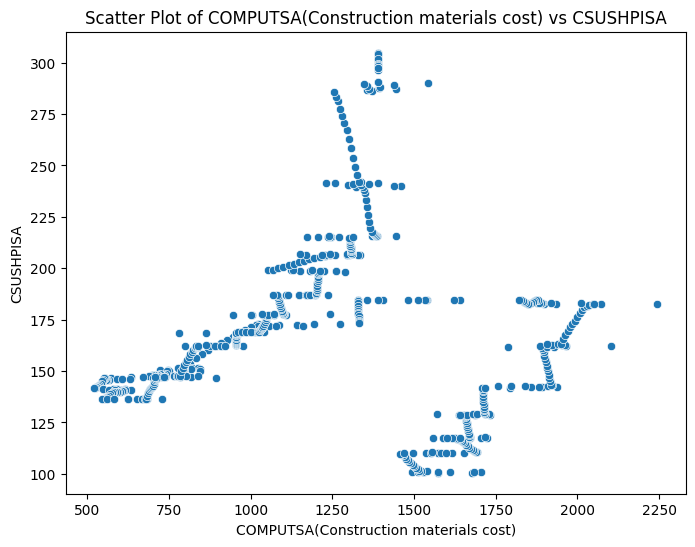

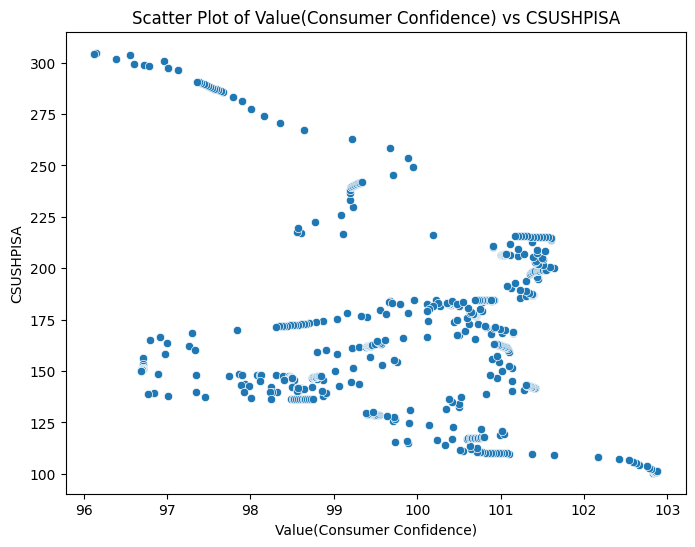

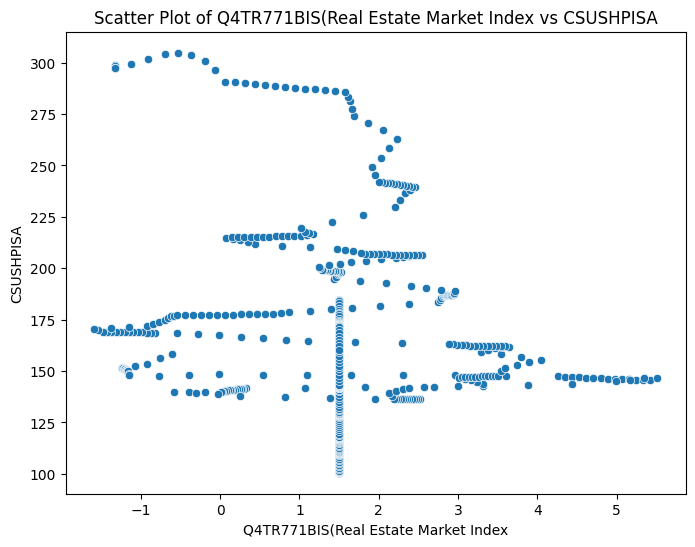

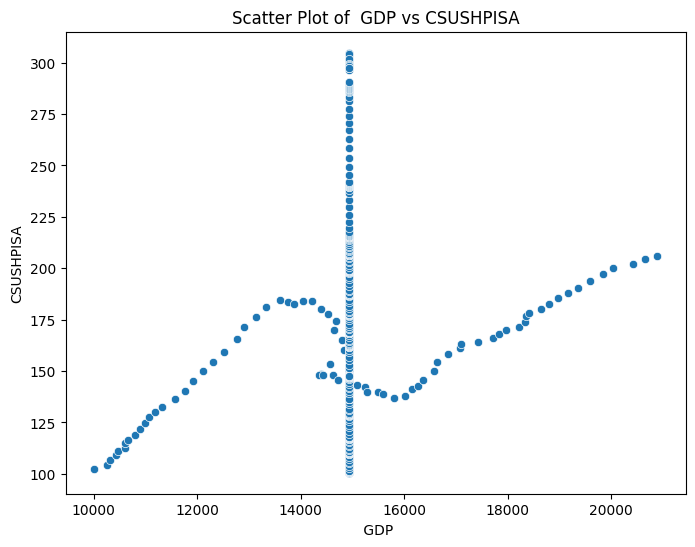

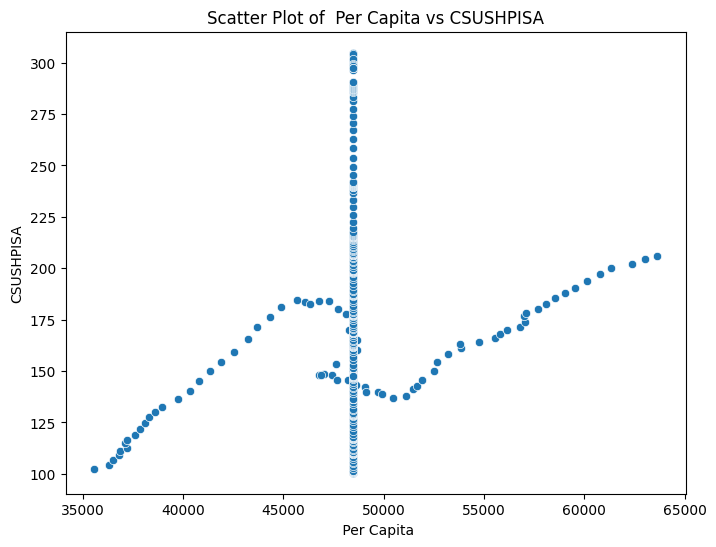

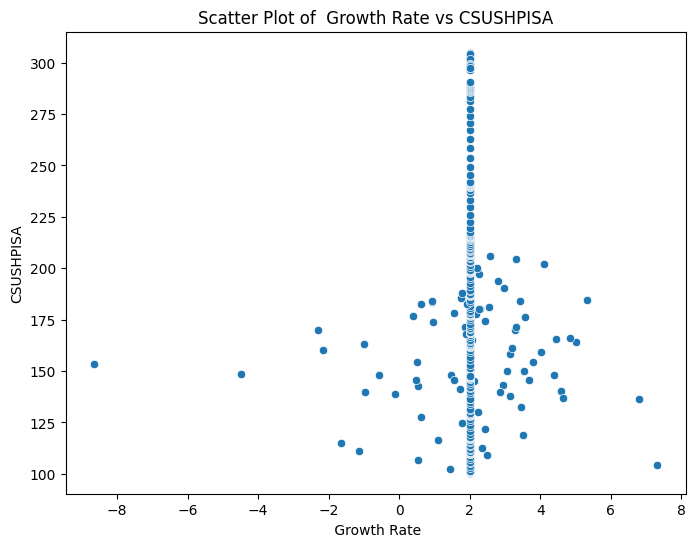

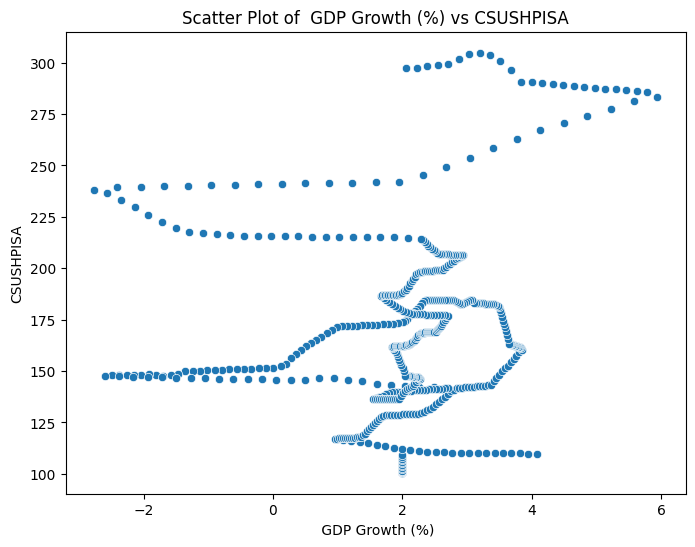

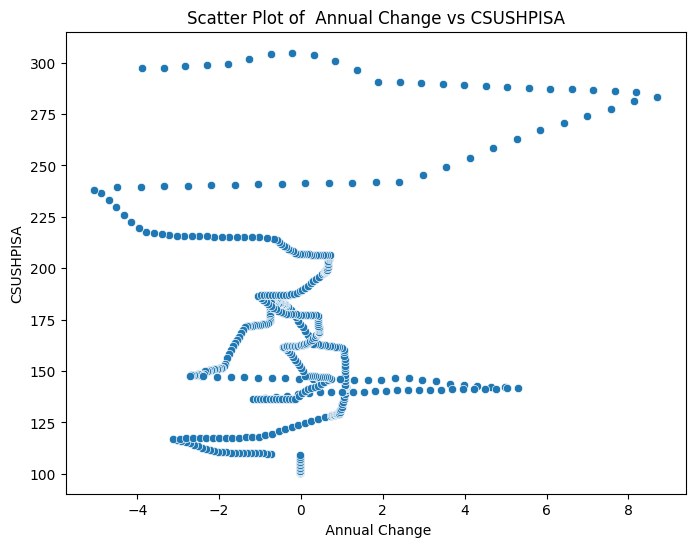

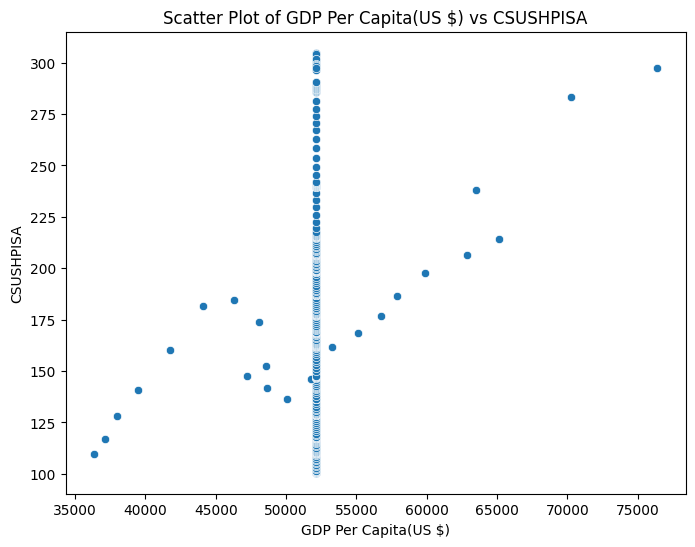

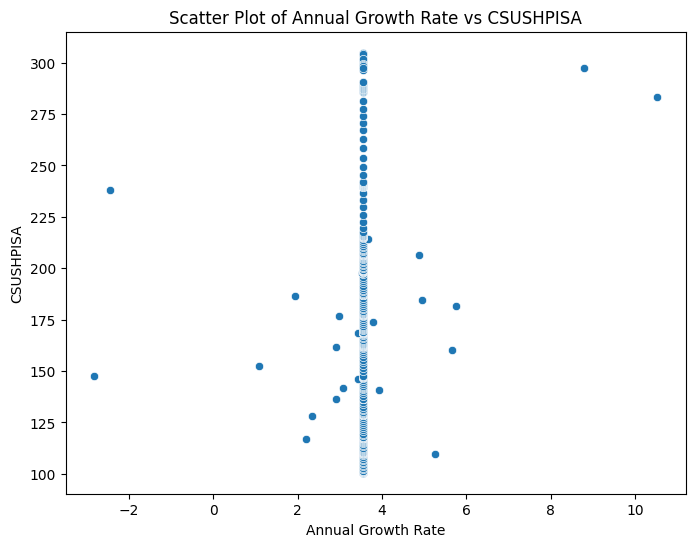

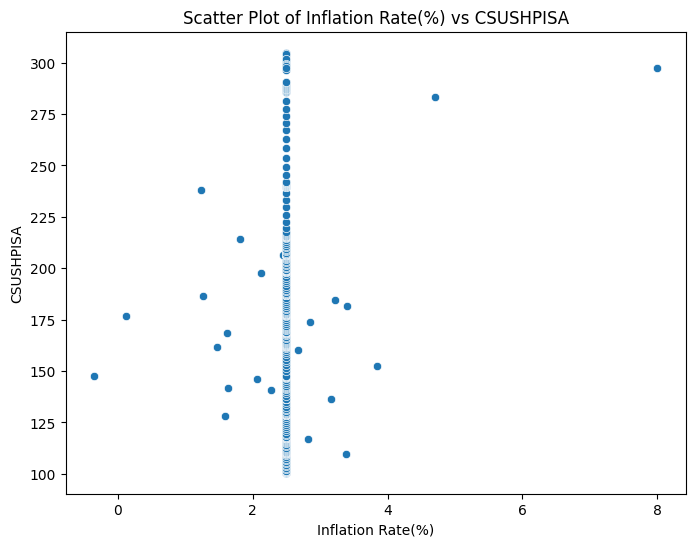

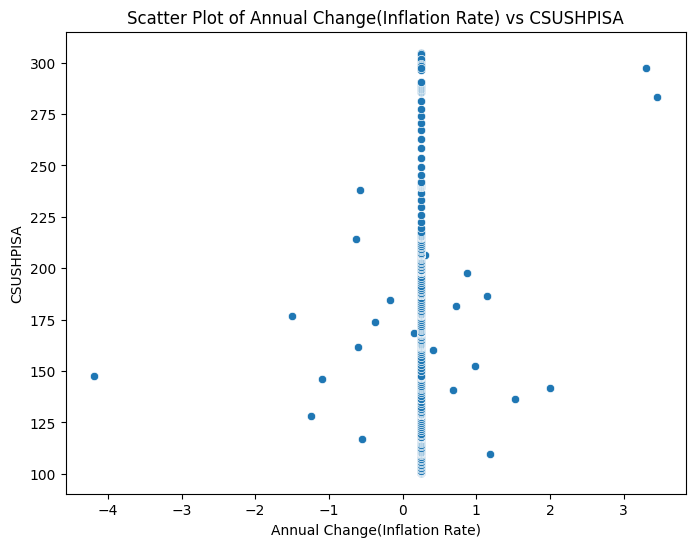

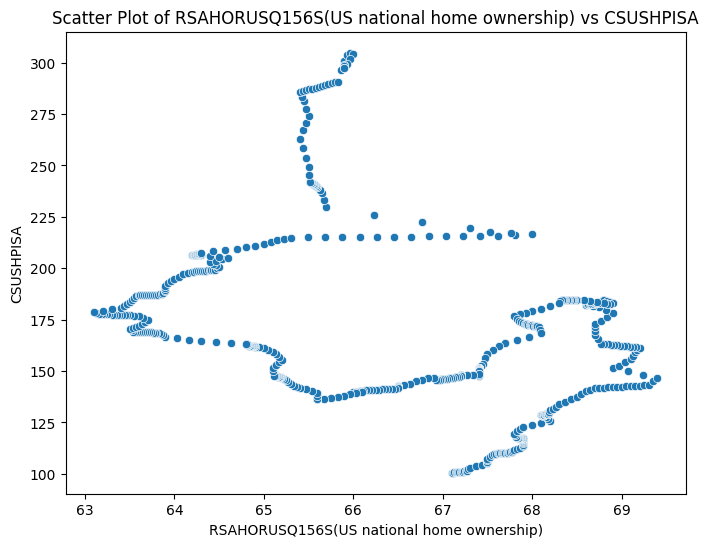

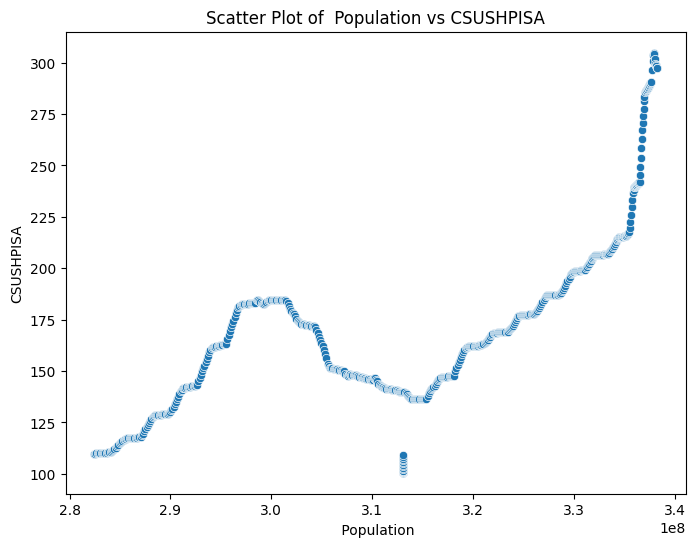

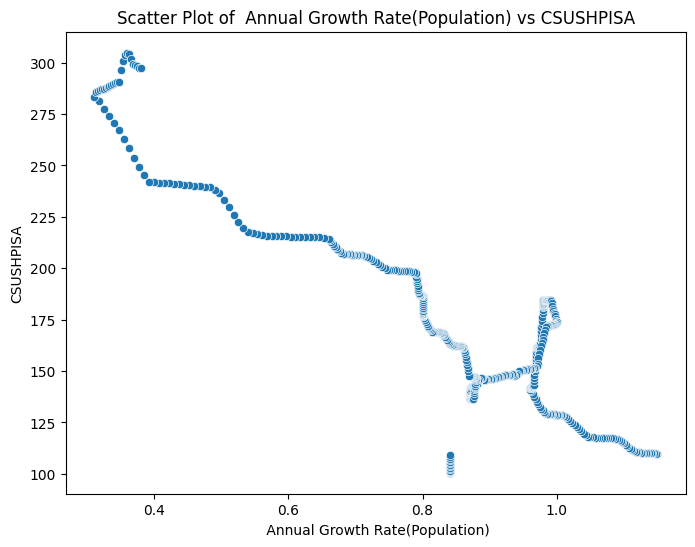

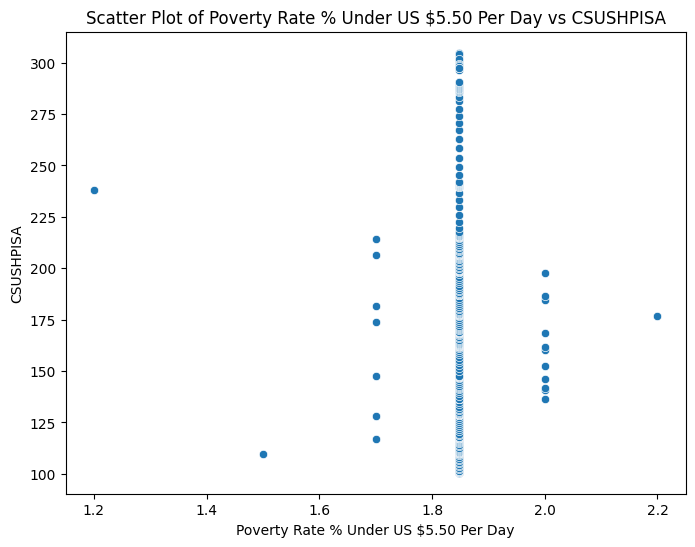

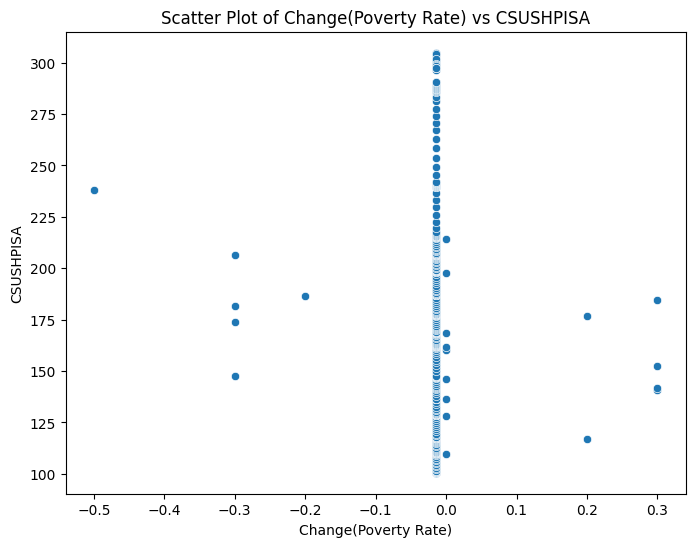

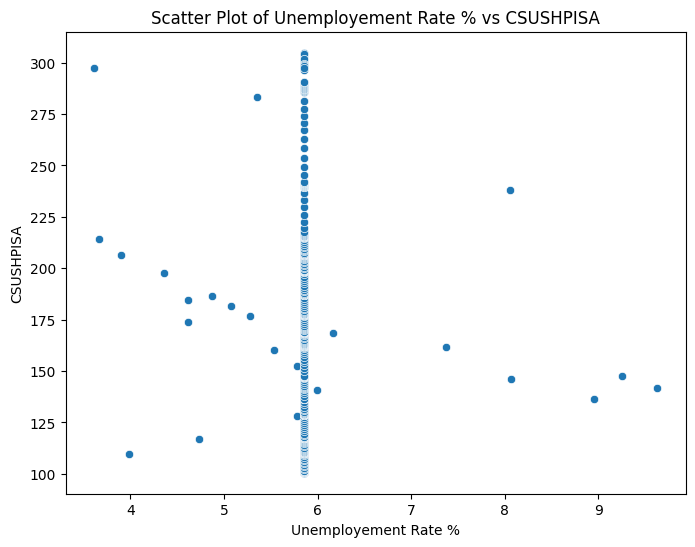

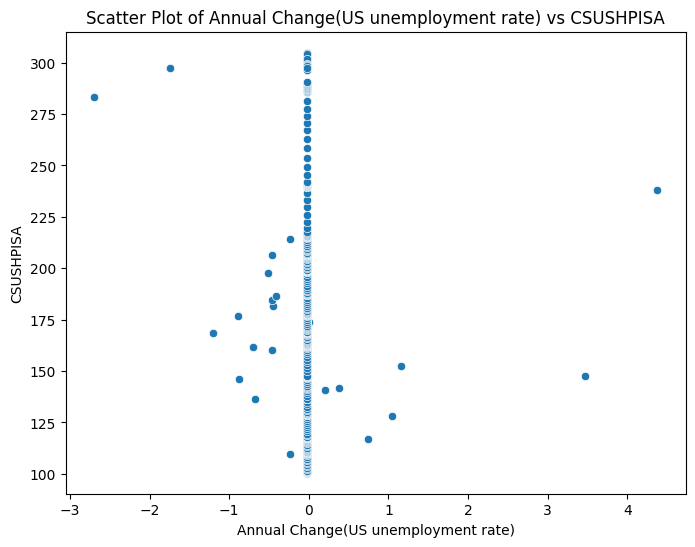

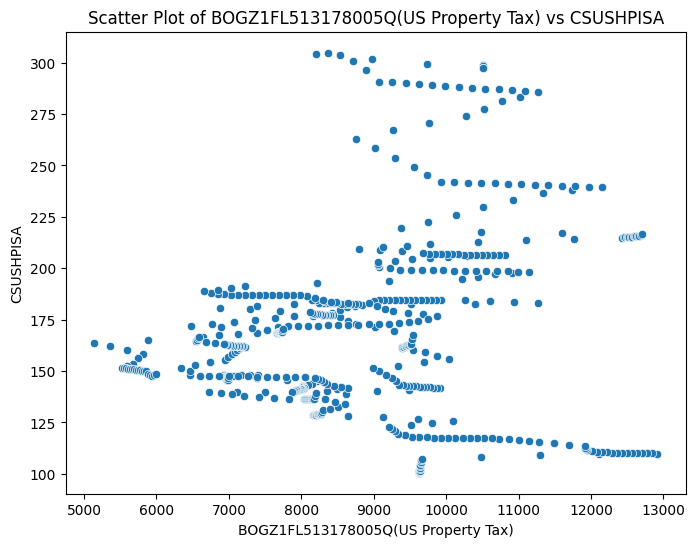

In [25]:
# List of features to plot
features_to_plot = ['CUUR0000SEHA(Price to Rent)', ' Population', 'Crude oil (WTISPLC)',
                         'COMPUTSA(Construction materials cost)', 'Value(Consumer Confidence)', 
                         'Q4TR771BIS(Real Estate Market Index', ' GDP', ' Per Capita', ' Growth Rate',
                       ' GDP Growth (%)',' Annual Change', 'GDP Per Capita(US $)', 
                        'Annual Growth Rate', 'Inflation Rate(%)', 'Annual Change(Inflation Rate)', 
                       'RSAHORUSQ156S(US national home ownership)', ' Population', ' Annual Growth Rate(Population)',
                       'Poverty Rate % Under US $5.50 Per Day', 'Change(Poverty Rate)', 'Unemployement Rate %',
                        'Annual Change(US unemployment rate)', 'BOGZ1FL513178005Q(US Property Tax)']

# Create separate scatter plots for each pair of features
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=data, x=feature, y="CSUSHPISA")
    plt.xlabel(feature)
    plt.ylabel("CSUSHPISA")
    plt.title(f"Scatter Plot of {feature} vs CSUSHPISA")
    plt.show()

In [33]:
# import the necessary libraries to build the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Split data into training and testing sets
X = data.drop(columns=["CSUSHPISA", "DATE", "LOCATION"])  # Features
y = data["CSUSHPISA"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print regression metrics
print("Linear Regression - MSE:", mse_lr, "R-squared:", r2_lr)
print("Random Forest - MSE:", mse_rf, "R-squared:", r2_rf)
print("XGBoost - MSE:", mse_xgb, "R-squared:", r2_xgb)


Linear Regression - MSE: 100.06822807325625 R-squared: 0.9608840548638736
Random Forest - MSE: 0.8351770850815902 R-squared: 0.9996735353301641
XGBoost - MSE: 2.787841706024953 R-squared: 0.9989102528812517


From the above results it is clear that,

Random Forest and XGBoost are performing exceptionally well, with significantly lower MSE values and very high R2 values. These models are strong candidates for further consideration.


So lets try with some hyperparameter tuning and cross validation for the Random Forest and XGBoost models.

# Random Forest Hyperparameter Tuning

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required at each leaf node
}

# Create the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Create GridSearchCV to search for best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, 
                               scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search_rf.fit(X_train, y_train)  

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

# Print the best hyperparameters
print("Best Random Forest Hyperparameters:", best_params_rf)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [35]:
# Use the best hyperparameters to create the Random Forest model
best_rf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'],
                                max_depth=best_params_rf['max_depth'],
                                min_samples_split=best_params_rf['min_samples_split'],
                                min_samples_leaf=best_params_rf['min_samples_leaf'],
                                random_state=42)

# Fit the best model on the full training data
best_rf.fit(X_train, y_train)  

# Evaluate the model on the test dataset (if available)
rf_test_predictions = best_rf.predict(X_test)  
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_predictions))  

# Print the RMSE on the test data
print("Random Forest RMSE on Test Data:", rf_test_rmse)


Random Forest RMSE on Test Data: 0.9138802356335266


In general, a lower RMSE indicates a better model fit, so this result suggests that our Random Forest model is performing well in terms of predicting home prices on the test data. 

While you have RMSE, it's also a good practice to calculate the R-squared (coefficient of determination) for our model on the test data.

In [36]:
# to calculate the R squared value
from sklearn.metrics import r2_score

rf_test_r2 = r2_score(y_test, rf_test_predictions)  
print("Random Forest R-squared on Test Data:", rf_test_r2)


Random Forest R-squared on Test Data: 0.9996735353301641


The R-squared value of 0.9996735353301641 is exceptionally high, and it suggests that your Random Forest model is doing an outstanding job of explaining the variance in the target variable (home prices) on our test data.

# XGBoost Hyperparameter Tuning

In [37]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds
    'max_depth': [3, 4, 5, 6],               # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage used in update
    'subsample': [0.8, 0.9, 1.0],            # Fraction of samples used for training
    'colsample_bytree': [0.8, 0.9, 1.0]      # Fraction of features used for training
}

# Create the XGBoost regressor
xgb_reg = xgb.XGBRegressor(random_state=42)

# Create RandomizedSearchCV to search for best hyperparameters
random_search_xgb = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_grid_xgb, 
                                       scoring='neg_mean_squared_error', cv=5, n_iter=50, 
                                       verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search_xgb.fit(X_train, y_train) 

# Get the best hyperparameters
best_params_xgb = random_search_xgb.best_params_
best_xgb = random_search_xgb.best_estimator_

# Print the best hyperparameters
print("Best XGBoost Hyperparameters:", best_params_xgb)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best XGBoost Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [38]:
# we are going to use these best parameters
best_xgb = XGBRegressor(
    subsample=0.8,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42  
)

# Fit the model on your training data
best_xgb.fit(X_train, y_train)  


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [40]:
# Use the best XGBoost model to make predictions on your test data
xgb_test_predictions = best_xgb.predict(X_test) 

# Calculate the Root Mean Square Error (RMSE) on the test data
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, xgb_test_predictions)) 

# Calculate the R-squared (R²) value on the test data
xgb_test_r2 = r2_score(y_test, xgb_test_predictions)

# Print the RMSE and R-squared values
print(f"XGBoost RMSE on Test Data: {xgb_test_rmse}")
print(f"XGBoost R-squared on Test Data: {xgb_test_r2}")


XGBoost RMSE on Test Data: 1.3735469733699994
XGBoost R-squared on Test Data: 0.9992625295023553


Let's compare the performance of the Random Forest (RF) and XGBoost models based on the RMSE and R-squared (R²) values:

**Random Forest Model:**
- RMSE on Test Data: 0.9138802356335266
- R-squared on Test Data: 0.9996735353301641

**XGBoost Model:**
- RMSE on Test Data: 1.3735469733699994
- R-squared on Test Data: 0.9992625295023553

Here's the comparison:

- **RMSE**: Lower RMSE values indicate better model performance, as they represent smaller prediction errors. In this case, the Random Forest model has a lower RMSE (0.9139) compared to the XGBoost model (1.3735). Therefore, the Random Forest model performs better in terms of RMSE.

- **R-squared (R²)**: Higher R-squared values indicate that the model explains more of the variance in the target variable. Both models have exceptionally high R-squared values, indicating that they explain the variance in home prices very well. However, the Random Forest model has a slightly higher R-squared value (0.9997) compared to the XGBoost model (0.9993).

Based on these results, the Random Forest model appears to perform slightly better in terms of RMSE and R-squared on the test data. 



Now we are going to apply cross-validation techniques to both the Random Forest and XGBoost models to assess their robustness and generalization to new data. Cross-validation will help you obtain more reliable performance metrics and ensure that the models perform consistently across different subsets of the data.

We'll use k-fold cross-validation, where k is the number of folds (typically 5 or 10).

# Cross-Validation for Random Forest (RF):

In [41]:
from sklearn.model_selection import cross_val_score

# Define your Random Forest model (best_rf or another instance)
rf_model = best_rf  # Replace with your Random Forest model

# Perform k-fold cross-validation (e.g., 5-fold)
num_folds = 5  # You can adjust the number of folds as needed
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the Root Mean Square Error (RMSE) for each fold
rf_rmse_scores = np.sqrt(-rf_cv_scores)

# Print the RMSE scores for each fold
for i, score in enumerate(rf_rmse_scores):
    print(f"Fold {i+1}: RMSE = {score}")

# Calculate and print the mean RMSE and standard deviation
rf_mean_rmse = np.mean(rf_rmse_scores)
rf_std_rmse = np.std(rf_rmse_scores)
print(f"Mean RMSE: {rf_mean_rmse}")
print(f"Standard Deviation RMSE: {rf_std_rmse}")


Fold 1: RMSE = 1.7126117306690758
Fold 2: RMSE = 2.208570885134764
Fold 3: RMSE = 1.8969712578671603
Fold 4: RMSE = 1.214560501382953
Fold 5: RMSE = 1.4148156069962718
Mean RMSE: 1.6895059964100447
Standard Deviation RMSE: 0.35043746993058345


Overall, the Random Forest model exhibits an average RMSE of approximately 1.6895, which means that, on average, the model's predictions have an error of about 1.6895 units when compared to the actual values. The standard deviation of 0.3504 suggests that the model's performance is relatively consistent across different subsets of the data.

# Cross-Validation for XGBoost:

In [42]:
# Define your XGBoost model (best_xgb or another instance)
xgb_model = best_xgb  # Replace with your XGBoost model

# Perform k-fold cross-validation (e.g., 5-fold)
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=num_folds, scoring='neg_mean_squared_error')

# Calculate the Root Mean Square Error (RMSE) for each fold
xgb_rmse_scores = np.sqrt(-xgb_cv_scores)

# Print the RMSE scores for each fold
for i, score in enumerate(xgb_rmse_scores):
    print(f"Fold {i+1}: RMSE = {score}")

# Calculate and print the mean RMSE and standard deviation
xgb_mean_rmse = np.mean(xgb_rmse_scores)
xgb_std_rmse = np.std(xgb_rmse_scores)
print(f"Mean RMSE: {xgb_mean_rmse}")
print(f"Standard Deviation RMSE: {xgb_std_rmse}")


Fold 1: RMSE = 1.639088436763305
Fold 2: RMSE = 3.2601882374619158
Fold 3: RMSE = 2.1750937613596575
Fold 4: RMSE = 1.3719399193793922
Fold 5: RMSE = 1.5386072911667377
Mean RMSE: 1.9969835292262015
Standard Deviation RMSE: 0.6864818390513199


Conclusion:

Based on the cross-validation results, we can make the following observations:

The Random Forest model has a lower mean RMSE (1.6895) compared to the XGBoost model (1.9970), indicating that, on average, the Random Forest model's predictions are closer to the actual values.

The Random Forest model also has a lower standard deviation of RMSE (0.3504) compared to the XGBoost model (0.6865), suggesting that the Random Forest model's performance is more consistent across different data subsets.

Given these results, the Random Forest model appears to be the better-performing model in terms of RMSE and consistency in predictions across different data subsets. Therefore, you may choose the Random Forest model as the preferred model for this problem. However, it's essential to consider other factors such as model interpretability and business context when making the final decision.

# Feature Importance

Examine the feature importance results for both models to identify which features have the most significant impact on predicting home prices. Understanding feature importance can provide valuable insights into the factors that influence home prices.


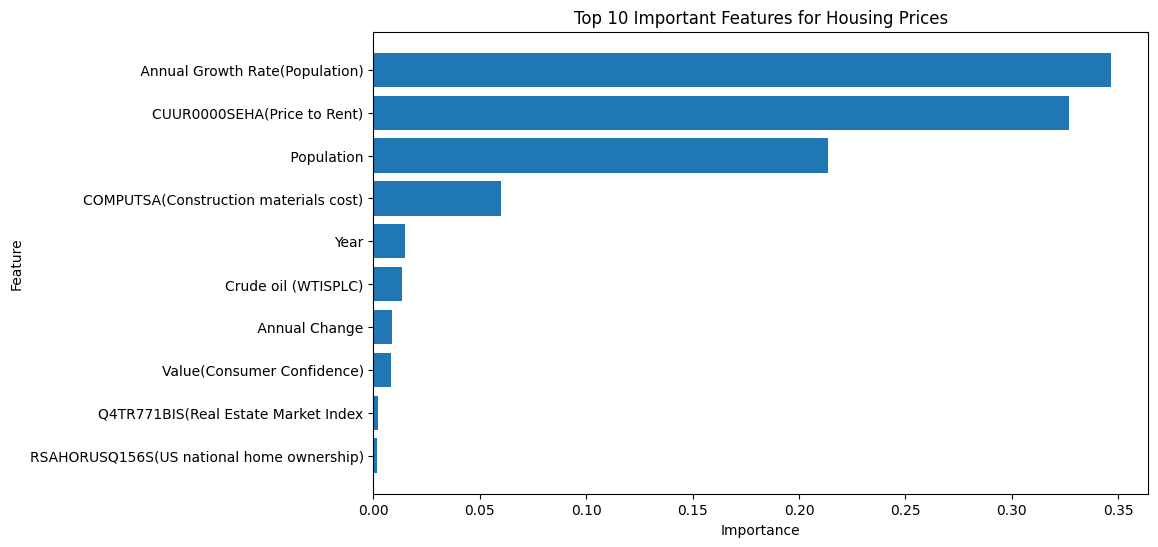

In [49]:
import matplotlib.pyplot as plt

# Extract feature importance (replace model with your trained model)
feature_importance = rf_model.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features (change N to your desired number)
top_n = 10  # You can change this to the number of top features you want to display
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features for Housing Prices'.format(top_n))
plt.gca().invert_yaxis()  # Reverse the order to display the most important at the top
plt.show()


From the visual it is clear that the top ten features which affected the US house pricing over the past 20 years.